### 분류(Classification)모델
: 예측 값이 범주로 미리 정해지는 경우
 * 2가지 범주: 0과 1, '음성' or '양성',Logistic Regression, Binary Classification
  * 3개 이상의 범주 : 'A'~'F'학점, Multi Classitication
  
<sklearn의 분류 모델 클래스>
* Decision Tree(결정트리)
* Logistic Regression
* Naive Bayes
* Support Vector Machine
* Nearest Neighblr(최소 근접 알고리즘)

### 결정 트리 (Decision Tree)

#### 의사 결정 트리, 의사 결정 나무라고도 함, 대표적인 분류 학습 모델, 회귀도 가능, 스무고개와 유사

#### 나무를 거꾸로 뒤집어 놓은 모양: 루트 노드 --> 규칙 노드(중간 노드) --> 리프노드(끝노드)

[1] 불순도(impurity): 해당범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 말한다, 불확실성, 무질서도

[2] 엔트로피(Entropy): 불순도를 수치적으로 나타내는 척도, 엔트로피가 높다는 것은 불순도가 높다, 1이면 불순도가 최대

[3] 정보이득(Imformation Gain): 1-(엔트로피)
 * 결정트리는 분류(구분)한 뒤 각 영역의 순도가 증가, 불순도가 감소하는 방향으로 학습을 진행, 정보이론에서는 정보이득
 
[4] 지니계수(Gini Coefficient): 1-(각 범주별 데이터 비율의 제곱의 합), 0이면 최소(끝노드), 1이면 최대



### Iris(붓꽃) 품종 예측하기

In [80]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# iris의 품종 : [0:'setosa',1:'versicolor',2:'virginica']
# 붓꽃의 데이터 세트를 로딩
iris = load_iris()
type(iris)  # Bunch : sklearn 고유의 타입  , DataFrame 이 아님

# x값, 피쳐만 추출
iris_data = iris.data
print(iris_data.shape)  # (150, 4) , 2차원 ndarray
print(type(iris_data))
print(iris.feature_names)  # sepal: 꽃받침, petal : 꽃잎
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

# y값, 답(label) 만 추출
iris_label = iris.target
print(iris_label.shape)   # (150,)
print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label
print(iris_df['label'].value_counts())  # 50 ,50,50
iris_df

(150, 4)
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']
2    50
1    50
0    50
Name: label, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# train(학습) 데이터와 test(검증) 데이터 세트로 분리 : 80%:20%, 120개(train),30개(test)
X_train,X_test,y_train, y_test = train_test_split(iris_data, iris_label,
                                                  test_size=0.2,
                                                  random_state=11) # seed값  # random seed를 고정
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [4]:
# 학습(Train) 수행
dt_clf = DecisionTreeClassifier(random_state=11)  # random seed를 고정
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [5]:
# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

In [6]:
# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score,classification_report

print('정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# cl_report = classification_report(y_test,pred)
# print('리포트:\n',cl_report)

정확도:0.9333


In [7]:
### 결정트리 모델의 시각화 : 학습 과정을 시각화함

# train(학습) 데이터와 test(검증) 데이터 세트로 분리 : 80%:20%, 120개(train),30개(test)
X_train,X_test,y_train, y_test = train_test_split(iris_data, iris_label,
                                                  test_size=0.2,
                                                  random_state=11)  # random seed를 고정
X_train.shape,X_test.shape,y_train.shape, y_test.shape

# 학습(Train) 수행
dt_clf = DecisionTreeClassifier(random_state=11)  # random seed를 고정
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [8]:
# fit()으로 학습 수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot', class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=True,filled=True)

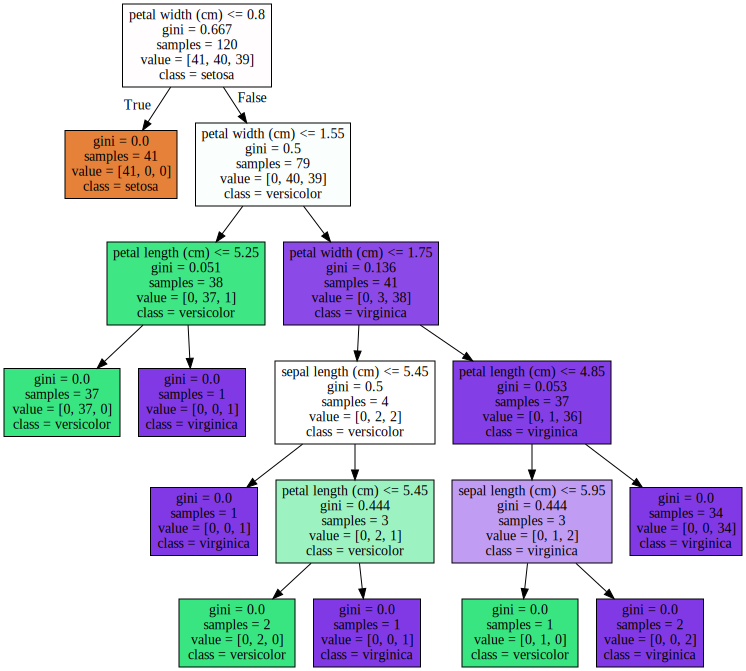

In [9]:
# tree 스크립트 파일을 불러와서 그래프로 출력
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
# 지니 계수 : 1 - (각  범주별 데이터의 비율의 제곱의 함), 0 이면 leaf node(끝노드)
# 지니계수가 높을 수록 데이터가 분산되어 있음을 의미한다. / Binary Split 형태
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]

gini = 1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)
print(round(gini,3))

# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
gini = 1 - ((0/79)**2 + (40/79)**2 + (39/79)**2)
print(round(gini,3))

# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa
gini = 1 -(41/41)**2 
print(round(gini,3))

0.667
0.5
0.0


In [11]:
# gini 계수 함수 구현
def gini(values):
    array_of_values = np.array(values)
    array_of_sum = array_of_values.sum()  # 전체 데이터 갯수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)

print(gini([41, 40, 39]))  # 0.667
print(gini([0, 40, 39]))   # 0.5
print(gini([41, 0, 0]))    # 0.0, 3개 중에서 2개가 0이면 leaf node(끝노드)

0.667
0.5
0.0


feature importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


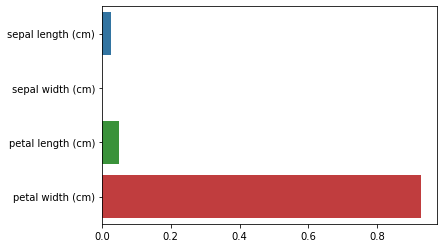

In [12]:
# feature importance : 결정트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선 순위
print('feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name,value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

import seaborn as sns
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)
# x와 y를 설정한 막대그래프(x축 값 : feature importance)

iris_df.corr() # 상관계수와 feature importance는 다른 값임
# 상관계수: 1에 가까울수록 비례, -1에 가까울수록 반비례

### 내부 알고리즘 처리 과정 분석

In [13]:
# gini 계수 함수 구현
def gini(values):
    array_of_values = np.array(values)
    array_of_sum = array_of_values.sum()  # 전체 데이터 갯수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)


In [24]:
# 0번(첫번째 노드) : 루트 노드, 규칙 노드
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setos
first_df = pd.DataFrame(data = X_train,columns=iris.feature_names)
first_df['label'] = y_train
first_df.shape  # (120, 5)

print(first_df['label'].value_counts())  # 분류할 데이터의 갯수 알아내는 것
value = [41,40,39]
print(gini(value))  # 0.667, 지니계수가 크므로 자식노드(1번과 2번) 생성

# feature importance가 가장 높은 피쳐인 petal width(cm)를 규칙으로 사용
first_df[first_df['label'] == 0]['petal width (cm)'].max()  # 0.1, setosa
first_df[first_df['label'] == 0]['petal width (cm)'].min()  # 0.6, setosa
first_df[first_df['label'] == 1]['petal width (cm)'].min()  # 1.6, versicolor
first_df[first_df['label'] == 2]['petal width (cm)'].min()  # 1.4, virtinica

# 규칙 생성 : petal width (cm) <=0.8

# 자식 노드 생성
second_node = first_df[first_df['petal width (cm)']<=0.8]
second_node.shape  #(41, 5)

third_node = first_df[first_df['petal width (cm)'] > 0.8]
third_node.shape   # (79, 5)

0    41
1    40
2    39
Name: label, dtype: int64
0.667


(79, 5)

In [30]:
# 1번(두번째) 노드 : 첫 번째 터미널 노드, 리프 노드
# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa # (0이 아닌 것에 해당하는 거 찾으면)

print(second_node['label'].value_counts())
value = [41, 0, 0]
print(gini(value))  # 0.0, 지니계수가 0이므로 leat node가 됨, 더 이상 브랜치하지 않음

# leaf node인 경우
setosa_result = second_node.copy()
setosa_result

0    41
Name: label, dtype: int64
0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
3,5.0,3.3,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
8,5.5,3.5,1.3,0.2,0
12,4.6,3.4,1.4,0.3,0
17,5.0,3.2,1.2,0.2,0
19,5.1,3.8,1.6,0.2,0
25,4.4,3.2,1.3,0.2,0
26,5.4,3.4,1.7,0.2,0
28,5.1,3.7,1.5,0.4,0


In [36]:
# 2번(세번째) 노드 : 규칙노드
# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor

print(third_node['label'].value_counts())
value = [0, 40, 39]
print(gini(value))  # 0.5, 지니계수 크므로 자식노드(3,4번) 브랜치하기로 결정

# 자식노드 생성
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55]
fourth_node.shape # (38, 5)
fifth_node = third_node[third_node['petal width (cm)'] > 1.55]
fifth_node.shape  # (41, 5)

1    40
2    39
Name: label, dtype: int64
0.5


(41, 5)

In [39]:
# 3번(네번째) 노드
# petal length (cm) <= 5.25
# gini = 0.051
# samples = 38
# value = [0, 37, 1]
# class = versicolor
print(fourth_node['label'].value_counts())
value = [0,37,1]
print(gini(value))  # 0.051, 지니계수가 작지만 지식노드(5,6번) 브랜치하기로 결정

# feature importance가 두번째로 높은 'petal length (cm)'을 피쳐로 선택
# 규칙 : petal length (cm) <= 5.25
sixth_node = fourth_node[fourth_node['petal length (cm)'] <= 5.25]
sixth_node.shape  # (37, 5)
seventh_node = fourth_node[fourth_node['petal length (cm)'] > 5.25]
seventh_node.shape  # (1, 5)

1    37
2     1
Name: label, dtype: int64
0.051


(1, 5)

In [45]:
# 4번(다섯번째 노드) : 규칙노드
# petal width (cm) <= 1.75
# gini = 0.136
# samples = 41
# value = [0, 3, 38]
# class = virginica

print(fifth_node['label'].value_counts())
value = [0,3,38]
print(gini(value)) # 0.136, 지니계수가 작지만 두 가지가 혼합되어 자식노드(7,8)생성

# 자식노드 생성
eigth_node = fifth_node[fifth_node['petal width (cm)'] <= 1.75]
eigth_node.shape  # (4, 5)
ninth_node = fifth_node[fifth_node['petal width (cm)'] > 1.75]
ninth_node.shape 

2    38
1     3
Name: label, dtype: int64
0.136


(37, 5)

In [49]:
# 5번(여섯번째) 노드 : 두번째 터미널 노드, 리프노드
# gini = 0.0
# samples = 37
# value = [0, 37, 0]
# class = versicolor
print(sixth_node['label'].value_counts())
value = [0, 37, 0]
print('gini:',gini(value))            # 0, leaf node
print('class:',iris.target_names[1])  # class = versicolor

versicolor_result = sixth_node.copy()
versicolor_result

1    37
Name: label, dtype: int64
gini: 0.0
class: versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.0,2.0,3.5,1.0,1
13,6.9,3.1,4.9,1.5,1
15,5.1,2.5,3.0,1.1,1
16,6.6,2.9,4.6,1.3,1
22,5.9,3.0,4.2,1.5,1
24,6.7,3.1,4.7,1.5,1
27,6.5,2.8,4.6,1.5,1
36,6.1,2.8,4.7,1.2,1
38,5.6,3.0,4.1,1.3,1
41,5.5,2.6,4.4,1.2,1


In [50]:
# 6번(일곱번째) 노드 : 세번째 터미널 노드, 리프노드
# gini = 0.0
# samples = 1
# value = [0, 0, 1]
# class = virginica
print(seventh_node['label'].value_counts())
value = [0,0,1]
print('gini:',gini(value))            # 0, leaf node
print('class:',iris.target_names[2])  # class = virginica 

virginica_result = seventh_node.copy()
virginica_result

2    1
Name: label, dtype: int64
gini: 0.0
class: virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
30,6.1,2.6,5.6,1.4,2


In [51]:
# 중간 생략 : 7~16번 노드(숙제)
# leaf node일 경우 각 클래스별 result에 append시켜야 함

In [53]:
# 최종 학습 분류 결과 출력 확인 : 중간 생략 누락된 결과 제외하고
fit_result = pd.concat([setosa_result, versicolor_result,virginica_result],axis=0)
print(fit_result)
print(fit_result['label'].value_counts())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
3                  5.0               3.3                1.4               0.2   
4                  4.7               3.2                1.6               0.2   
8                  5.5               3.5                1.3               0.2   
12                 4.6               3.4                1.4               0.3   
..                 ...               ...                ...               ...   
115                6.8               2.8                4.8               1.4   
117                5.5               2.4                3.7               1.0   
118                6.1               3.0                4.6               1.4   
119                5.5               2.4                3.8               1.1   
30                 6.1               2.6                5.6               1.4   

     label  
0        0  
3

### 결정 트리의 파라메터 튜닝 : 학습 시간 및 과적합 제어

### 과적합(Overfitting)
: 학습데이터에서는 예측 정확도가 높이 나오는데 학습에서 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 정확도가 떨어지는 경우, 피쳐가 지나치게 많을 때도 발생

In [57]:
# DecisionTreeClassifier(
#     criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     class_weight=None,
#     presort='deprecated',
#     ccp_alpha=0.0,
# )

* max_depth : 트리의 최대 깊이, None, 깊이가 너무 깊으면 과적합
* min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합 제어
* min_samples_leaf : 리프 노드가 되기 위한 최소의 샘플 데이터 수, 1
* max_features : 최대 피처의 갯수, None
* max_leaf_nodes : 리프노드의 최대 갯수, None

#### [1] max_depth 값 조정 : 트리의 최대 깊이, 깊이가 너무 깊으면 과적합, 정확도에 영향

In [85]:
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = None) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1) #정확도: 0.6333, 정확도 감소
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2) #정확도: 0.8667, 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 3) #정확도: 0.9333, 적당
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 4) #정확도: 0.9333, 정확도 변화 없음

dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### [2] min_samples_split :  노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합 제어, 정확도에 영향

In [73]:
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_split=2) #정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_split=4) #정확도: 0.9333
dt_clf = DecisionTreeClassifier(random_state=11,min_samples_split=41) #정확도: 0.9333, 적정
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_split=42) #정확도: 0.8667, 정확도 감소

dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### [3] min_samples_leaf : 리프 노드가 되기 위한 최소의 샘플 데이터 수, 1

In [78]:
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=1) #정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=4) #정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=5) #정확도: 0.8667, 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=39) #정확도: 0.9333, 적정
# dt_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=40) #정확도: 0.6333, 정확도 감소

dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


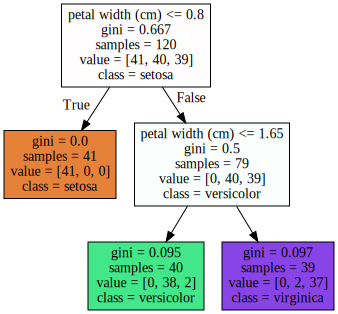

In [81]:
# fit()으로 학습 수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot', class_names=iris.target_names,
               feature_names=iris.feature_names,impurity=True,filled=True)

# tree 스크립트 파일을 불러와서 그래프로 출력
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)


In [82]:
# dot 파일을 png 파일로 저장
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [83]:
# dot 파일을 jpg 파일로 저장
! dot -Tjpg tree.dot > tree.jpg